<a href="https://colab.research.google.com/github/DHimeka/ML-DL-/blob/main/MyPytorch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pytorch Workflow ; https://www.learnpytorch.io/01_pytorch_workflow/

In [1]:
import torch
import numpy as np
from torch import nn #  building blocks for nn
import matplotlib.pyplot as plt
torch.__version__

'2.0.1+cu118'

#Data Preparing and Loading
Can be anything
* CSV
*img
*Videos
*txt
*Audio

ML is a game of two parts.


1.   Get data into numerical representation
2.   Build a model to learn patterns




In [2]:
#with known parameters

weight = 0.7
bias = 0.3

#we are going to build a model to estimate above

#create
start= 0
end= 1
step=0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X +bias

X[:10],y[:10],len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

##Spliitting Dataset into Training and Test Sets

In [3]:
train_split =int(0.8*len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)



```
train_split =int(0.6*len(X))
validation_split =int(0.8*len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_validation,y_validation = X[train_split:validation_split],y[train_split:validation_split]
X_test, y_test = X[validation_split:],y[validation_split:]

len(X_train), len(y_train), len(X_validation),len(y_validation),len(X_test), len(y_test)
```



In [4]:
from prompt_toolkit.shortcuts.progress_bar.formatters import Label
def plot_predictions(train_data=X_train, train_labels=y_train,test_data=X_test,test_labels=y_test, predictions=None):
  """
  Plot training data,test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  #training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  #test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Test Data")

  #Are there predictions?
  if predictions is not None:
    #plot them
    plt.scatter(test_data,predictions,c="r",s=4, label="Predictions")
  #Show the legend
  plt.legend(prop={"size":14});

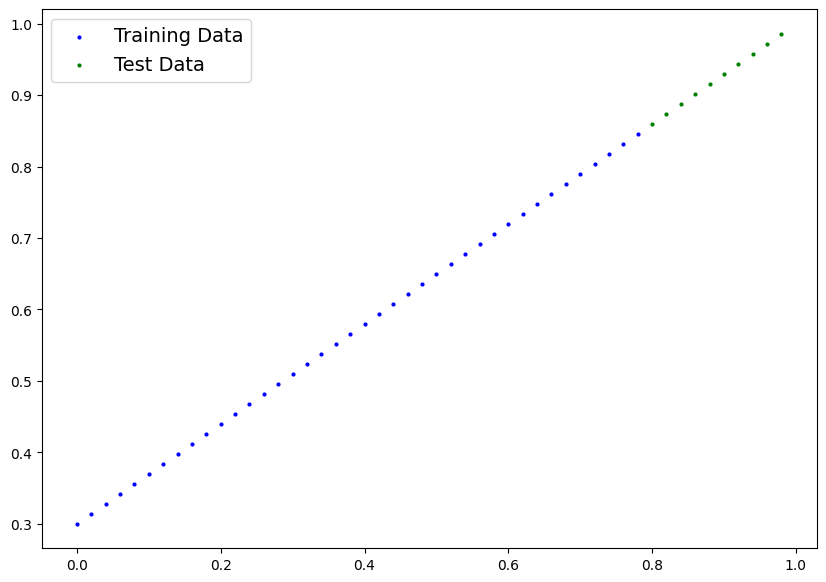

In [5]:
plot_predictions();

#Building the Model

In [6]:
#Linear Regression Module
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    #start with random values for weights and bias
    self.weights = nn.Parameter(torch.rand(1,
                                              requires_grad=True,
                                              dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                              requires_grad=True,
                                              dtype=torch.float))
  # we look at training data and adjust parameters until we get closer values to what
  #are expected.
  def forward(self,x:torch.Tensor)-> torch.Tensor:#"x" is the input data (e.g. training/testing features)
    return self.weights*x+self.bias


*   nn.Module contains the larger building blocks (layers)
*   nn.Parameter contains the smaller parameters like weights and biases (put these together to make nn.Module(s))
* forward() tells the larger blocks how to make calculations on inputs (tensors full of data) within nn.Module(s)
* torch.optim contains optimization methods on how to improve the parameters within nn.Parameter to better represent input data



###Checking content in model

In [7]:
torch.manual_seed(42)
model0 = LinearRegressionModel()
list(model0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [8]:
#list named parameter dictionary
model0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [9]:
weight, bias #we go until model parametrs get close to these values.

(0.7, 0.3)

###Making predictions using  ```torch.inference_mode()```

how well it van predict y_test using X_test

pass data ---> going to run in forward()


In [10]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [11]:
y_preds =model0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]], grad_fn=<AddBackward0>)

In [12]:
#make predictions with model
with torch.inference_mode():
  y_preds =model0(X_test)

#with torch.no_grad(): #similar output as inference_mode, but inference_mode is preferred.  #y_preds =model0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

practice inference_mode(), lacks grad_function which is in precious part(gradient tracking)

we dont need to keep track of gradients in training.

**therefore faster**

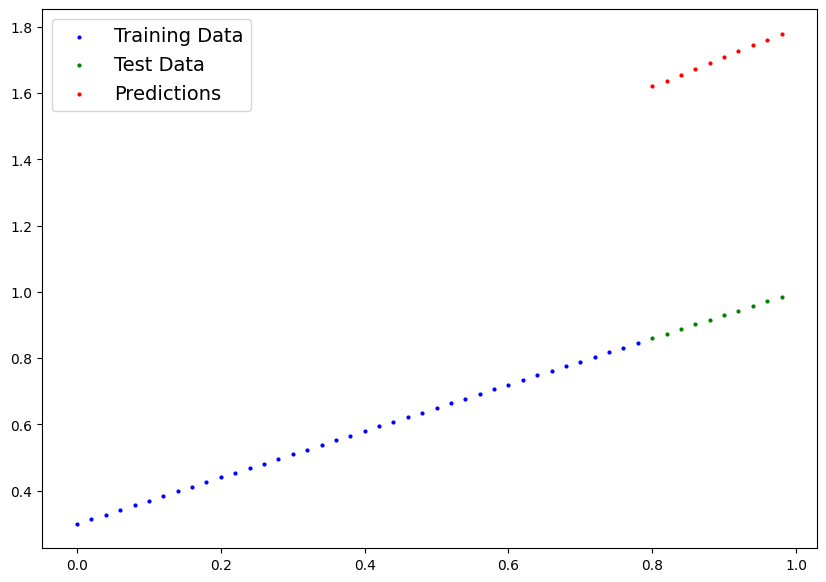

In [13]:
plot_predictions(predictions=y_preds)

In [14]:
#what we expect is for red dots to be just over green dots
#model is quite bad
#we are going to get them closer

###Train Model

moving model from nknown random paramers to known parameters

measure how poor the models predictions are to use a Loss Function

**Loss Function** lower the better

common loss functions
*  MAE (mean absolute error) loss function for regression problems(predicting a number)

    measures the absolute difference between two points (predictions and labels) and then takes the mean across all examples.
    
*  binary cross entropy loss function for classification problems (predicting one thing or another)



**Optimizer** take loss; adjust the model parameters
common optimizers
*   SGD (stochastic gradient descent)
*   Adam optimizer



**We need a training loop and a testing loop**




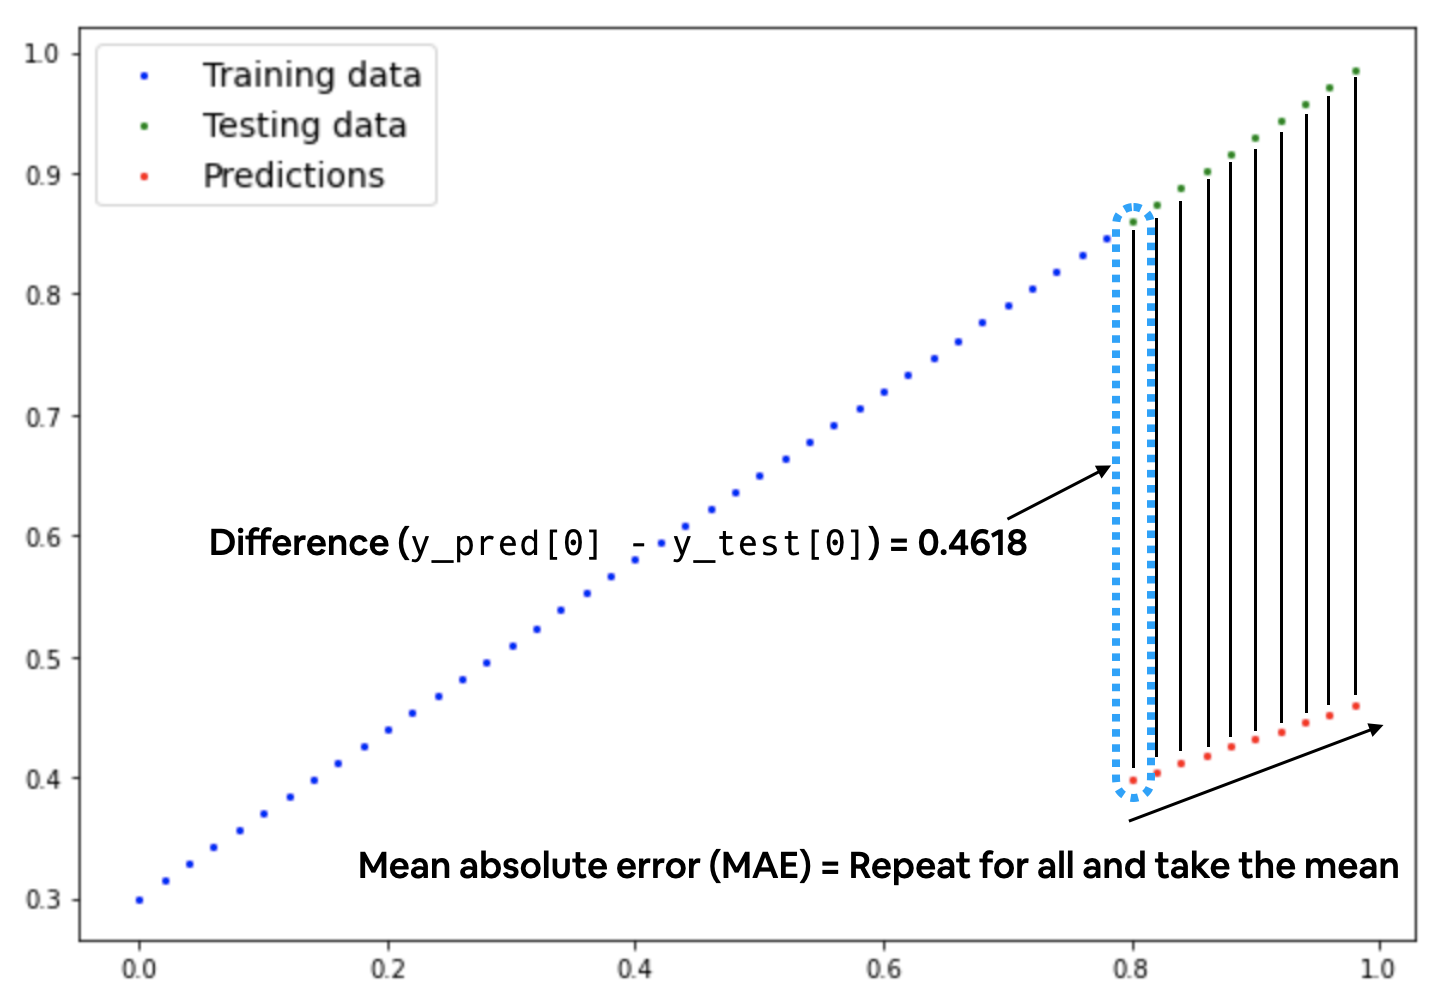

In [15]:
loss_fn =nn.L1Loss() #MAE Loss function
#take |y_pred-y_test| and take mean

#set up an optimizer
optimizer = torch.optim.SGD(params=model0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time)) default 0.1

learning rate : rate you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values).


The learning rate is considered a hyperparameter (because it's set by a machine learning engineer). Common starting values for the learning rate are **0.01, 0.001, 0.0001**, however, these can also be adjusted over time (this is called learning rate scheduling).

###Building Training and Testing Loops



1.   Loop through data
2.   Forward Propagation (Data moving forward)
3.   Calculate Loss
4.   Optimizer 0 grad
5.   Loss Backwards ; Back Propagation
6.   Optimizer step





In [16]:
torch.manual_seed(42)
#An epoch is one loop through the data
epochs =200
#tracking for future
epoch_count =[]
loss_values =[]
test_loss_values =[]
#loop
for epoch in range(epochs):
  #set the model to training mode
  model0.train()#train mode in pytorch set all parameters that need gradient to track gradient

  #forward pass
  y_pred=model0(X_train)
  #calculate loss
  loss = loss_fn(y_pred,y_train)
  #print(f"Loss:{loss}")
  #optimizer 0 grad
  optimizer.zero_grad()

  #backprop
  loss.backward()

  #step the optimizer(gd)
  optimizer.step()

  model0.eval()#turn off different features(gradient tracking) not needed for evaluatin/testing
  with torch.inference_mode():#turns off gradient tracking
    #forward pass
    test_pred = model0(X_test)

    #calculate the loss
    test_loss =loss_fn(test_pred,y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch:{epoch}| Loss:{loss}| Test_loss:{test_loss}")

  #print
    print(model0.state_dict())


Epoch:0| Loss:0.6860889196395874| Test_loss:0.7637526988983154
OrderedDict([('weights', tensor([0.8784])), ('bias', tensor([0.9050]))])
Epoch:10| Loss:0.5708791017532349| Test_loss:0.6290428042411804
OrderedDict([('weights', tensor([0.8394])), ('bias', tensor([0.8050]))])
Epoch:20| Loss:0.45566922426223755| Test_loss:0.4943329691886902
OrderedDict([('weights', tensor([0.8004])), ('bias', tensor([0.7050]))])
Epoch:30| Loss:0.34045934677124023| Test_loss:0.35962313413619995
OrderedDict([('weights', tensor([0.7614])), ('bias', tensor([0.6050]))])
Epoch:40| Loss:0.2252494841814041| Test_loss:0.2249133139848709
OrderedDict([('weights', tensor([0.7224])), ('bias', tensor([0.5050]))])
Epoch:50| Loss:0.1100396141409874| Test_loss:0.09020347893238068
OrderedDict([('weights', tensor([0.6834])), ('bias', tensor([0.4050]))])
Epoch:60| Loss:0.009724985808134079| Test_loss:0.020998019725084305
OrderedDict([('weights', tensor([0.6539])), ('bias', tensor([0.3200]))])
Epoch:70| Loss:0.00621675467118620

In [17]:
#make predictions with model
with torch.inference_mode():
  y_preds_new =model0(X_test)

#with torch.no_grad(): #similar output as inference_mode, but inference_mode is preferred.  #y_preds =model0(X_test)

y_preds_new

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

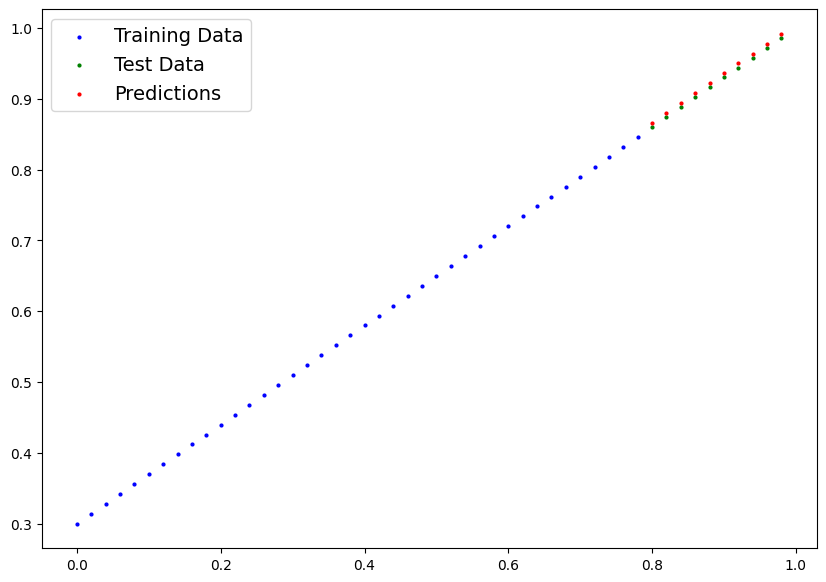

In [18]:
plot_predictions(predictions=y_preds_new)

In [19]:
np.array(torch.tensor(loss_values).numpy()),test_loss_values

(array([0.6860889 , 0.5708791 , 0.45566922, 0.34045935, 0.22524948,
        0.11003961, 0.00972499, 0.00621675, 0.00278832, 0.00709595,
        0.00709595, 0.00709595, 0.00709595, 0.00709595, 0.00709595,
        0.00709595, 0.00709595, 0.00709595, 0.00709595, 0.00709595],
       dtype=float32),
 [tensor(0.7638),
  tensor(0.6290),
  tensor(0.4943),
  tensor(0.3596),
  tensor(0.2249),
  tensor(0.0902),
  tensor(0.0210),
  tensor(0.0141),
  tensor(0.0058),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075)])

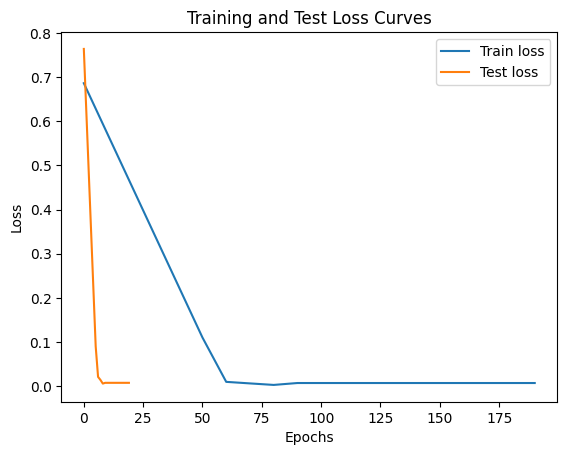

In [20]:
#plot counts
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train loss")
plt.plot(test_loss_values,label="Test loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();


##Saving a model in Pytorch


3 methods


1.   ```torch.save()``` - allows to save pytorch object in python's pickle format
2.   ```torch.load()``` - allows to load a saved pytorch object
3.   ```torch.nn.Module.load_state_dict()``` -allowa to load a models state dictionary



In [21]:
model0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [26]:
from pathlib import Path

#create a module directory
MODEL_PATH =Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#create and save modelpath
MODEL_NAME = "01_pytorch_workflow_model0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
#save model statedict
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to:models/01_pytorch_workflow_model0.pth


In [27]:
#check models folder
!ls -l models

total 4
-rw-r--r-- 1 root root 1203 Sep 17 08:24 01_pytorch_workflow_model0.pth


In [31]:
model0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

###Loading Pytorch model

create a new instance and load the already saved state_dict

In [30]:
# Instantiate a new instance of our model (this will be instantiated with random weights)

loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
#loaded_model_0.eval()


<All keys matched successfully>

In [32]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [33]:
#ypreds after putting to model0 and loaded preds after putting to loaded_model should be equal
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [35]:
model0.eval()
with torch.inference_mode():
  y_preds=model0(X_test)



In [36]:
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

create device-agnostic code: we have to use GPU, for faster executing
if no GPU: code gets CPU



In [71]:
#device agnostic code
device= "cuda" if torch.cuda.is_available() else "cpu"
print(f"using :{device}")

using :cuda


In [72]:
#putting it all together
weight=0.7
bias=0.3
#data
#create data using linear regression
X=torch.arange(0,1,0.02).unsqueeze(dim=1)
y=weight*X+bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [73]:
#split
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

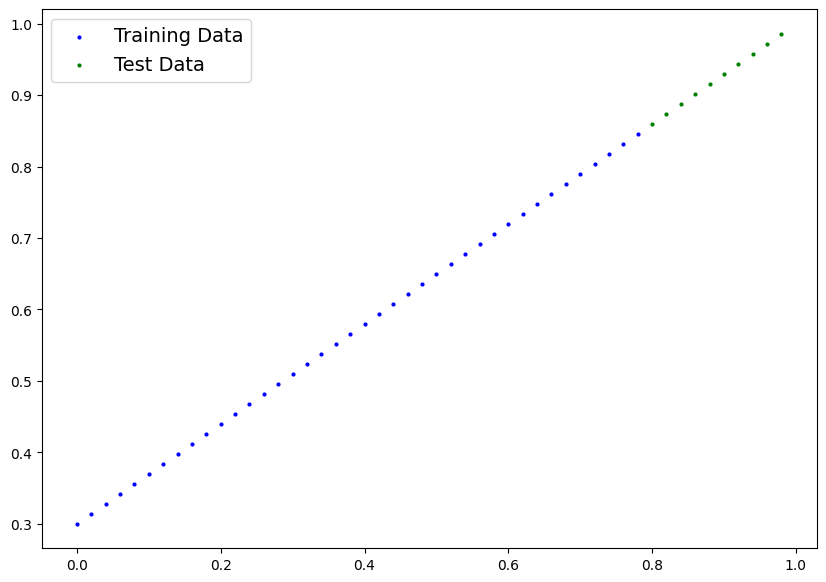

In [74]:
plot_predictions(X_train,y_train,X_test,y_test)

In [75]:
#building a pytorch linear model
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #Use nn.Linear() for model parameters
    self.linear_layer =nn.Linear(in_features=1,out_features=1)
    #forward part already inside nn.Layers, also the parameters
  #linear transform/probe layr/dense layer in tenserflow
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [76]:
loss_fn =nn.L1Loss()
optimizer =torch.optim.SGD(params=model_1.parameters(),lr=0.01)


In [77]:
torch.manual_seed(42)

epochs=200

for epoch in range(epochs):
  model_1.train()

  y_pred =model_1(X_train)

  loss =loss_fn(y_pred,y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss =loss_fn(test_pred,y_test)

  if epoch %10 ==0:
    print(f"Epoch: {epoch}|Loss:{loss}|Test Loss:{test_loss}")


Epoch: 0|Loss:0.5551779866218567|Test Loss:0.5739762187004089
Epoch: 10|Loss:0.4399680495262146|Test Loss:0.4392663538455963
Epoch: 20|Loss:0.3247582018375397|Test Loss:0.30455657839775085
Epoch: 30|Loss:0.20954827964305878|Test Loss:0.16984674334526062
Epoch: 40|Loss:0.09433844685554504|Test Loss:0.03513689711689949
Epoch: 50|Loss:0.023886386305093765|Test Loss:0.04784906655550003
Epoch: 60|Loss:0.0199567973613739|Test Loss:0.04580312222242355
Epoch: 70|Loss:0.016517987474799156|Test Loss:0.0375305712223053
Epoch: 80|Loss:0.013089170679450035|Test Loss:0.029944902285933495
Epoch: 90|Loss:0.009653178043663502|Test Loss:0.02167237363755703
Epoch: 100|Loss:0.006215679459273815|Test Loss:0.014086711220443249
Epoch: 110|Loss:0.002787243574857712|Test Loss:0.005814164876937866
Epoch: 120|Loss:0.0012645035749301314|Test Loss:0.013801807537674904
Epoch: 130|Loss:0.0012645035749301314|Test Loss:0.013801807537674904
Epoch: 140|Loss:0.0012645035749301314|Test Loss:0.013801807537674904
Epoch: 150

In [78]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [79]:
model_1.eval()
with torch.inference_mode():
  y_predsnew=model_1(X_test)

y_predsnew.device

device(type='cpu')

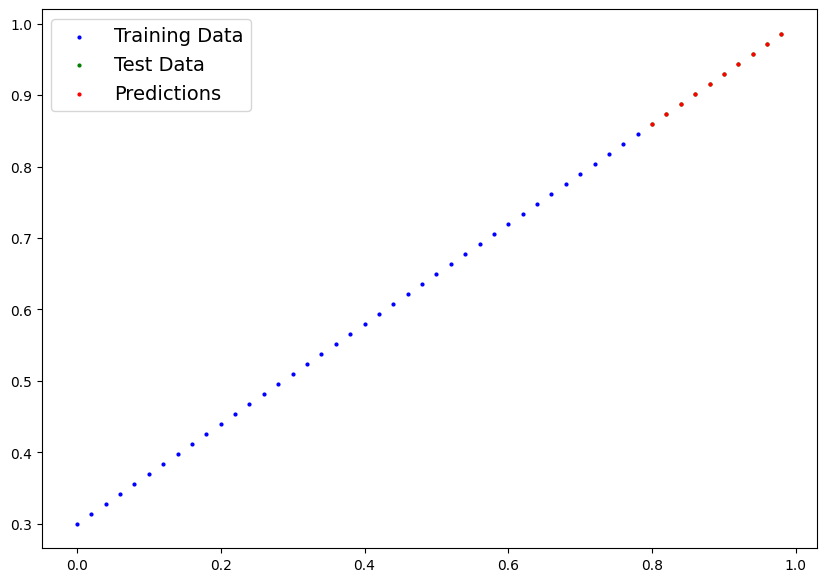

In [80]:
plot_predictions(predictions=y_predsnew)

In [89]:
#saving and loading model

from pathlib import Path

#create a module directory
MODEL_PATH =Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#create and save modelpath
MODEL_NAME = "01_pytorch_workflow_model1.pth"
MODEL_SAVE_PATH1 = MODEL_PATH/MODEL_NAME
#save model statedict
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH1)

Saving model to:models/01_pytorch_workflow_model1.pth


In [90]:

loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH1))

<All keys matched successfully>

In [92]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model1_preds=loaded_model_1(X_test)

loaded_model1_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

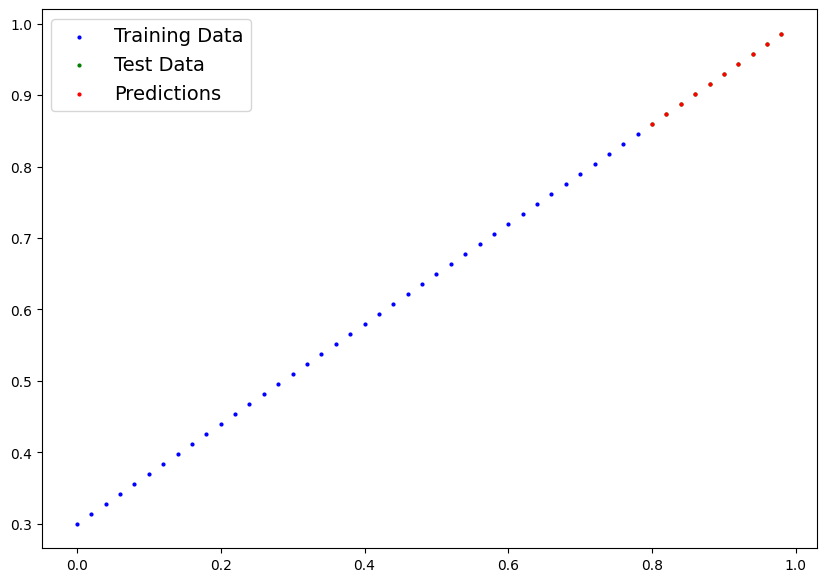

In [93]:
plot_predictions(predictions=loaded_model1_preds)